In [ ]:
  # Importing necessary libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text data into TF-IDF vectors
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier for text classification
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance
import nltk  # Natural Language Toolkit for text processing
from nltk.corpus import stopwords  # Stopwords corpus for filtering out common words
from nltk.tokenize import word_tokenize  # Tokenization for breaking text into words
from nltk.stem import WordNetLemmatizer  # Lemmatization for reducing words to their base form
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For statistical data visualization
from wordcloud import WordCloud  # For generating word clouds
import string  # For string operations

# Downloading necessary NLTK resources
nltk.download('punkt')  # Tokenization resources
nltk.download('stopwords')  # Stopwords resources
nltk.download('wordnet')  # WordNet lexical database


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Load the dataset
data = pd.read_csv('/content/spam.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.shape  #Checking the shape of dataset

(5572, 2)

In [ ]:
data.isna().sum()  #Calculating the sum of null value in data

Category    0
Message     0
dtype: int64

In [ ]:
# Generating descriptive statistics for the DataFrame
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
# Finding unique classes in the 'Category' column
classes = data['Category'].unique()
print(classes)

['ham' 'spam']


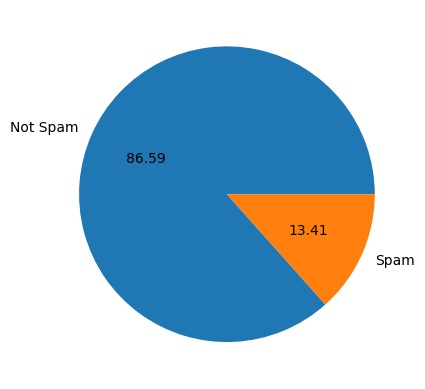

In [ ]:
# Creating a pie chart to visualize the distribution of categories
plt.pie(data['Category'].value_counts(), labels=['Not Spam', 'Spam'], autopct="%0.2f")  # Creating a pie chart with category counts and labels
plt.show()  # Displaying the pie chart

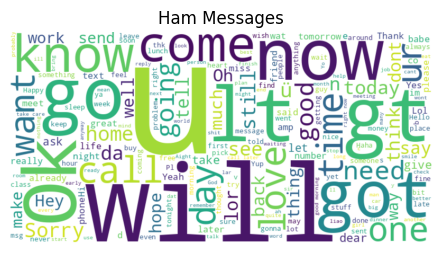

In [ ]:
# Generating a word cloud for 'ham' messages
ham_messages = ' '.join(data[data['Category'] == 'ham']['Message'])  # Concatenating all 'ham' messages into a single string
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_messages)  # Generating a word cloud for 'ham' messages
plt.figure(figsize=(12, 6))  # Setting the figure size
plt.subplot(1, 2, 1)  # Creating subplots
plt.imshow(wordcloud_ham, interpolation='bilinear')  # Displaying the word cloud for 'ham' messages
plt.title('Ham Messages')  # Setting the title of the plot
plt.axis('off')  # Turning off axis labels
plt.show()  # Displaying the plot

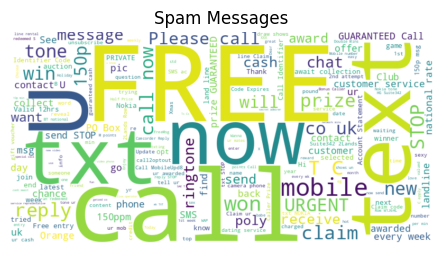

In [ ]:
# Generating a word cloud for 'spam' messages
spam_messages = ' '.join(data[data['Category'] == 'spam']['Message'])  # Concatenating all 'spam' messages into a single string
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)  # Generating a word cloud for 'spam' messages
plt.figure(figsize=(12, 6))  # Setting the figure size
plt.subplot(1, 2, 1)  # Creating subplots
plt.imshow(wordcloud_spam, interpolation='bilinear')  # Displaying the word cloud for 'spam' messages
plt.title('Spam Messages')  # Setting the title of the plot
plt.axis('off')  # Turning off axis labels
plt.show()  # Displaying the plot

In [ ]:
# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Removing stopwords and punctuation
    tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
# Apply text preprocessing to the 'Message' column
data['Message'] = data['Message'].apply(preprocess_text)
data['Message'].head()

0    go jurong point crazy .. available bugis n gre...
1                      ok lar ... joking wif u oni ...
2    free entry 2 wkly comp win fa cup final tkts 2...
3          u dun say early hor ... u c already say ...
4              nah n't think go usf life around though
Name: Message, dtype: object

In [ ]:
# Splitting the data into training and testing sets
X=data['Message']  #Extracting the 'Message' column as feature (X)
y=data['Category']   #Extracting the 'Category' column as target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Training the classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Making predictions
y_pred = classifier.predict(X_test_tfidf)

In [ ]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9713004484304932


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       955
        spam       1.00      0.80      0.89       160

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
# User input and prediction
user_input = input("Enter a message: ")
user_input_processed = preprocess_text(user_input)
user_input_tfidf = vectorizer.transform([user_input_processed])
user_prediction = classifier.predict(user_input_tfidf)
print("Predicted category:", user_prediction[0])